# Dependencies

In [1]:
library(ggsankey)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library(openxlsx)

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [1]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

# Tumor set

In [5]:
load(file = paste0(gitpath, "data/tumor_sampleprocessing.RData"))

In [6]:
head(ffpe_samples)

,sample_id,Shipped,DNAextracted,DNAused,librarypassed,Library preparation,libraryyield,DNAforcapture,captureyield,capturepassed,Successful capture,deepseq,Deep sequencing,mysample_id,TCR,TCR analysis,Patient,Tumor,Group
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,343-B,n = 25,1060,500,Passed,n = 25,258.24,258.24,10.070,Passed,n = 23,Yes,n = 21,CHP_343_B,No,n = 3,CHP_343,NA,NA
2,344-A,n = 25,9280,500,Passed,n = 25,287.04,287.04,10.070,Passed,n = 23,Yes,n = 21,CHP_344_A,Yes,n = 18,CHP_344,BL,NA
3,419,n = 25,248,248,Passed,n = 25,237.12,237.12,10.070,Passed,n = 23,Yes,n = 21,CHP_419,Yes,n = 18,CHP_419,OS,NA
4,358,n = 25,11900,500,Passed,n = 25,638.40,617.26,83.220,Passed,n = 23,No,n = 2,CHP_358,No,NA,CHP_358,NA,NA
5,384,n = 25,2460,500,Passed,n = 25,363.84,363.84,83.220,Passed,n = 23,No,n = 2,CHP_384,No,NA,CHP_384,NA,NA
6,401,n = 25,1740,500,Passed,n = 25,705.60,449.48,10.108,Passed,n = 23,Yes,n = 21,CHP_401,Yes,n = 18,CHP_401,ERMS,NA


In [7]:
df <- make_long(ffpe_samples, Shipped, `Library preparation`, `Successful capture`, 
                `Deep sequencing`, `TCR analysis`, Group, Tumor)

In [8]:
tail(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Library preparation,n = 25,Successful capture,n = 23
Successful capture,n = 23,Deep sequencing,n = 21
Deep sequencing,n = 21,TCR analysis,n = 18
TCR analysis,n = 18,Group,NA
Group,NA,Tumor,HD
Tumor,HD,NA,NA


In [8]:
unique(df$node)

[1] "n = 25"   "n = 23"   "n = 21"   "n = 4"    NA         "n = 17"  
 [7] "Lymphoma" "BL"       "n = 2"    "Solid"    "ERMS"     "BLL"     
[13] "NB"       "ALCL"     "DLBCL"    "OS"       "HD"       "PMBCL"

In [9]:
df$next_node <- factor(df$next_node, levels = c('ALCL','BL','BLL','DLBCL','ERMS','HD',
                                      'Lymphoma','n = 4','n = 17','n = 2','n = 23',
                                      'n = 21','n = 25','NB','OS','PMBCL','Solid'))

df$node <- factor(df$node, levels = c('ALCL','BL','BLL','DLBCL','ERMS','HD',
                                      'Lymphoma','n = 4','n = 17','n = 2','n = 23',
                                      'n = 21','n = 25','NB','OS','PMBCL','Solid'))

In [10]:
library(randomcoloR)
set.seed(5250)
myColors <- distinctColorPalette(17)
names(myColors) <- levels(factor(df$node))

In [11]:
#failed samples color grey
myColors["n = 2"] <- "grey"
myColors["n = 4"] <- "grey"

In [12]:
# Tumor types white
myColors[names(myColors) %in% c("ALCL", "BL", "BLL", "DLBCL", "ERMS", "HD", "PMBCL", "NB", "OS")] <- "white"

In [13]:
sankey <- ggplot(df, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = node, color = node,
               label = node)) +
  geom_sankey(flow.alpha = 0.5, na.rm = TRUE) +
  theme_sankey(base_size = 16) +
  geom_sankey_label(size = 5, hjust = 0.5,
                    color = 1, label.size = 0,
                    fill = alpha("white",0), na.rm = TRUE) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
      axis.text.x = element_text(size = 20, color = "black"),
     plot.title = element_text(hjust = 0.5, size = 30)) +
scale_fill_manual(values = myColors, na.value="white")+
scale_color_manual(values = myColors, na.value="white") + 
labs(title = "Tumor sample processing")

In [14]:
pdf(paste0(plotpath, "tumor_sankey.pdf"),
   width = 20, height = 10)
sankey
dev.off()

pdf 
  2

# PBMC

In [2]:
load(file = paste0(gitpath, "data/pbmc_sampleprocessing.RData"))

In [14]:
dim(pbmc_samples)

[1] 321  20

In [5]:
dim(pbmc_samples)

[1] 321  20

In [3]:
head(pbmc_samples)

,sample_id,Shipped,DNAextracted,DNAused,libbatch,librarypassed,Library preparation,libraryyield,captureyield,capbatch,capturepassed,Successful capture,deepseq,Deep sequencing,mysample_id,TCR,TCR analysis,Patient,Tumor,Group
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,330-05,n = 321,6160,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,825.6,155.42,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_330_05,No,n = 278,CHP_330,NA,NA
2,329-04,n = 321,11200,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,2006.4,155.42,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_329_04,No,n = 278,CHP_329,NA,NA
3,331-05,n = 321,3780,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,1161.6,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_331_05,No,n = 278,CHP_331,NA,NA
4,331-04,n = 321,9700,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,1555.2,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_331_04,No,n = 278,CHP_331,NA,NA
5,338-05,n = 321,1410,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,508.8,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_338_05,No,n = 278,CHP_338,NA,NA
6,338-04,n = 321,2460,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,883.2,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_338_04,No,n = 278,CHP_338,NA,NA


In [16]:
df <- make_long(pbmc_samples, Shipped, `Library preparation`, `Successful capture`, 
                `Deep sequencing`, `TCR analysis`, Group, Tumor)

In [17]:
tail(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Library preparation,n = 281,Successful capture,n = 277
Successful capture,n = 277,Deep sequencing,n = 277
Deep sequencing,n = 277,TCR analysis,n = 272
TCR analysis,n = 272,Group,NA
Group,NA,Tumor,NA
Tumor,NA,NA,NA


In [18]:
length(unique(df$node))

[1] 30

In [19]:
library(randomcoloR)
set.seed(5250)
myColors <- distinctColorPalette(30)
names(myColors) <- levels(factor(df$node))

In [20]:
#failed samples color grey
myColors["n = 24"] <- "grey"
myColors["n = 4"] <- "grey"
myColors["n = 39"] <- "grey"

In [21]:
# Tumor types white
myColors[names(myColors) %in% c("ALCL", "BL", "BLL", "DLBCL", "ERMS", "HD", "PMBCL", "NB", "OS", "WILMS",
                               "T-ALL", "SR-ALL", "HR ALL", "HB", "EWS", "CML", "ARMS",
                               "AML", "ALL")] <- "white"

In [22]:
head(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Shipped,n = 320,Library preparation,n = 281
Library preparation,n = 281,Successful capture,n = 277
Successful capture,n = 277,Deep sequencing,n = 277
Deep sequencing,n = 277,TCR analysis,n = 272
TCR analysis,n = 272,Group,Solid
Group,Solid,Tumor,OS


In [23]:
df$spacing <- NA
df$spacing[ df$x == "Group"] <- "10"

In [24]:
head(df)

x,node,next_x,next_node,spacing
<fct>,<chr>,<fct>,<chr>,<chr>
Shipped,n = 320,Library preparation,n = 281,NA
Library preparation,n = 281,Successful capture,n = 277,NA
Successful capture,n = 277,Deep sequencing,n = 277,NA
Deep sequencing,n = 277,TCR analysis,n = 272,NA
TCR analysis,n = 272,Group,Solid,NA
Group,Solid,Tumor,OS,10


In [25]:
sankey <- ggplot(df, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = node, color = node, 
               label = node)) +
  geom_sankey(flow.alpha = 0.5, na.rm = TRUE) +
  theme_sankey(base_size = 16) +
  geom_sankey_label(size = 5, hjust = 0.5,
                    color = 1, label.size = 0,
                    fill = alpha("white",0), na.rm = TRUE) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
      axis.text.x = element_text(size = 20, color = "black"),
     plot.title = element_text(hjust = 0.5, size = 30)) +
scale_fill_manual(values = myColors, na.value="white")+
scale_color_manual(values = myColors, na.value="white") + 
labs(title = "PBMC sample processing")

In [26]:
pdf(paste0(plotpath, "pbmc_sankey.pdf"),
   width = 20, height = 10)
sankey
dev.off()

pdf 
  2

# cfDNA

In [6]:
load(file = paste0(gitpath, "data/cfdna_sampleprocessing.RData"))

In [12]:
summary(cfdna_samples$DNAused)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.002  15.207  20.000  17.321  20.000  20.000 

In [22]:
head(cfdna_samples)

,sample_id,DNA samples,DNAextracted,DNAused,librarypassed,Library preparation,libraryyield,DNAforcapture,captureyield,capturepassed,Successful capture,deepseq,Deep sequencing,mysample_id,TCR,TCR analysis,Patient,Tumor,Group
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,346-01,n = 316,19.5600,20,Passed,n = 316,237.12,NA,NA,Failed,n = 21,No,NA,CHP_346_01,No,NA,CHP_346,NA,NA
2,348-01,n = 316,14.4000,20,Passed,n = 316,159.36,159.36,733.4,Passed,n = 295,Yes,n = 295,CHP_348_01,Yes,n = 279,CHP_348,OS,Solid
3,348-03,n = 316,24.4944,20,Passed,n = 316,227.52,227.52,733.4,Passed,n = 295,Yes,n = 295,CHP_348_03,Yes,n = 279,CHP_348,OS,Solid
4,343-04,n = 316,56.0000,20,Passed,n = 316,291.84,291.84,1052.6,Passed,n = 295,Yes,n = 295,CHP_343_04,Yes,n = 279,CHP_343,EWS,Solid
5,329-04,n = 316,40.0768,20,Passed,n = 316,314.88,314.88,1132.4,Passed,n = 295,Yes,n = 295,CHP_329_04,Yes,n = 279,CHP_329,HR ALL,Leukemia
6,331-05,n = 316,82.4000,20,Passed,n = 316,811.20,499.13,1565.6,Passed,n = 295,Yes,n = 295,CHP_331_05,Yes,n = 279,CHP_331,SR ALL,Leukemia


In [24]:
df <- make_long(cfdna_samples, `DNA samples`, `Library preparation`, `Successful capture`, 
                `Deep sequencing`, `TCR analysis`, Group, Tumor)

In [25]:
length(unique(df$node))

[1] 29

In [26]:
library(randomcoloR)
set.seed(5250)
myColors <- distinctColorPalette(29)
names(myColors) <- levels(factor(df$node))

In [27]:
myColors

ALCL       ALL       AML      ARMS        BL       BLL       CML     DLBCL 
"#66D2E3" "#6CDD99" "#DBEBE5" "#8B5E91" "#BE40E6" "#B1E27B" "#6F8573" "#DED876" 
     ERMS       EWS        HB        HD    HR ALL  Leukemia  Lymphoma     MS NB 
"#C9DE43" "#CDE4A7" "#E9B23F" "#E68187" "#7380DC" "#C978DA" "#6FA4DA" "#E4CFE5" 
   n = 16    n = 21   n = 279   n = 295   n = 316        NB        OS     PMBCL 
"#A2E1C9" "#E4456C" "#E1B781" "#CC9FA1" "#A1C5D7" "#62E9D5" "#DED5B7" "#D2774B" 
    Solid    SR ALL     T-ALL     WILMS      <NA> 
"#DF48BF" "#CCAAE5" "#E889BA" "#795ADE" "#71E95C"

In [28]:
#failed samples color grey
myColors["n = 21"] <- "grey"
myColors["n = 16"] <- "grey"

In [29]:
# Tumor types white
myColors[names(myColors) %in% c("ALCL", "BL", "BLL", "DLBCL", "ERMS", "HD", "PMBCL", "NB", "OS", "WILMS",
                               "T-ALL", "SR-ALL", "HR ALL", "HB", "EWS", "CML", "ARMS",
                               "AML", "ALL")] <- "white"

In [30]:
head(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
DNA samples,n = 316,Library preparation,n = 316
Library preparation,n = 316,Successful capture,n = 21
Successful capture,n = 21,Deep sequencing,NA
Deep sequencing,NA,TCR analysis,NA
TCR analysis,NA,Group,NA
Group,NA,Tumor,NA


In [31]:
df$spacing <- NA
df$spacing[ df$x == "Group"] <- "10"

In [32]:
head(df)

x,node,next_x,next_node,spacing
<fct>,<chr>,<fct>,<chr>,<chr>
DNA samples,n = 316,Library preparation,n = 316,NA
Library preparation,n = 316,Successful capture,n = 21,NA
Successful capture,n = 21,Deep sequencing,NA,NA
Deep sequencing,NA,TCR analysis,NA,NA
TCR analysis,NA,Group,NA,NA
Group,NA,Tumor,NA,10


In [33]:
sankey <- ggplot(df, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = node, color = node, 
               label = node)) +
  geom_sankey(flow.alpha = 0.5, na.rm = TRUE) +
  theme_sankey(base_size = 16) +
  geom_sankey_label(size = 5, hjust = 0.5,
                    color = 1, label.size = 0,
                    fill = alpha("white",0), na.rm = TRUE) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
      axis.text.x = element_text(size = 20, color = "black"),
     plot.title = element_text(hjust = 0.5, size = 30)) +
scale_fill_manual(values = myColors, na.value="white")+
scale_color_manual(values = myColors, na.value="white") + 
labs(title = "cfDNA sample processing")

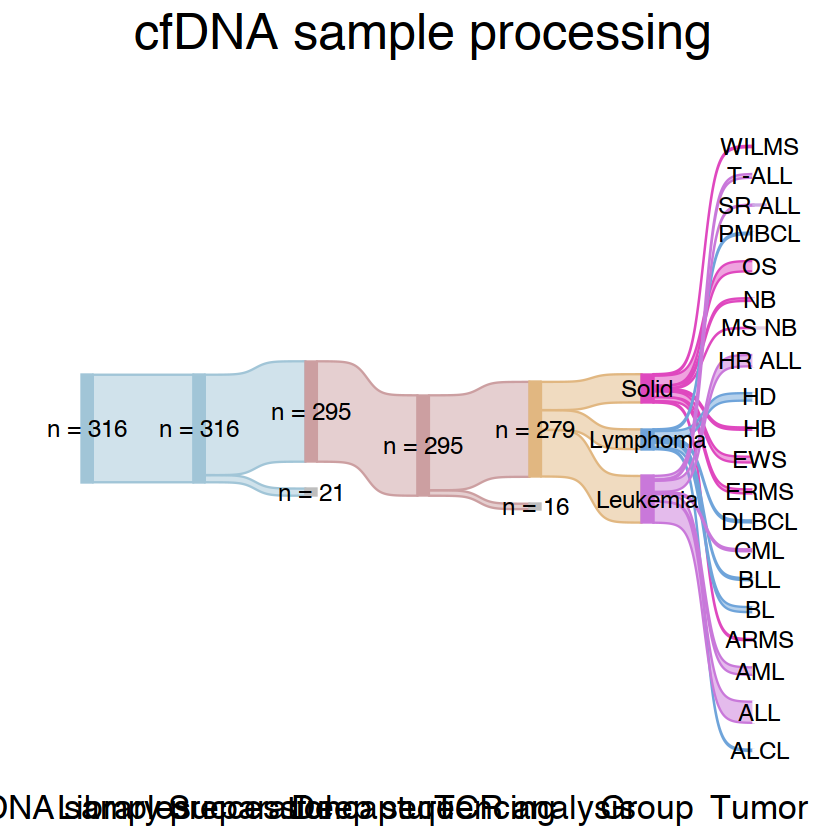

In [34]:
sankey

In [35]:
pdf(paste0(plotpath, "cfdna_sankey.pdf"),
   width = 20, height = 10)
sankey
dev.off()

pdf 
  2